In [ ]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def show_image(img,gray=False):
    if gray == True:
        plt.gray()
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

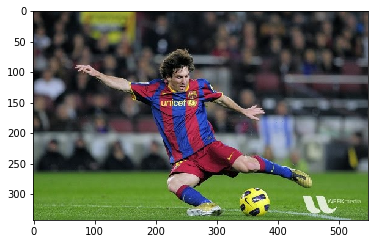

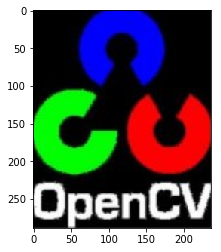

In [3]:
img1 = cv2.imread('../../images/messi5.jpg')
img2 = cv2.imread('../../images/opencv_logo.png')
show_image(img1)
show_image(img2)

In [4]:
# I want to put logo on top-left corner, So I create a ROI(Region of Interest)
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

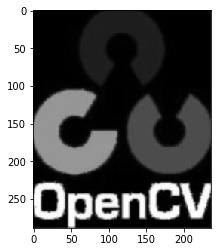

In [5]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
show_image(img2gray, True)

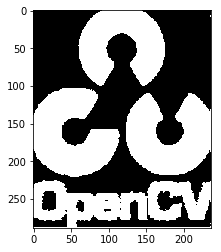

In [6]:
#二値画像化(10以下を0(黒), とする)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
show_image(mask, True)

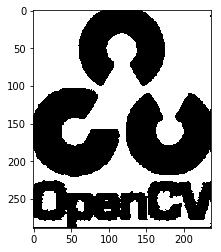

In [7]:
#ネガポジ反転
mask_inv = cv2.bitwise_not(mask)
show_image(mask_inv, True)

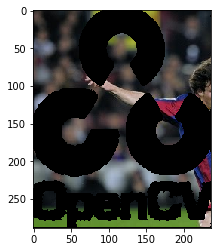

In [8]:
# 論理積計算(マスク部分は計算対象外で黒)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
show_image(img1_bg)

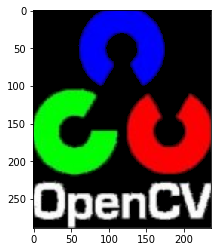

In [9]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
show_image(img2_fg)

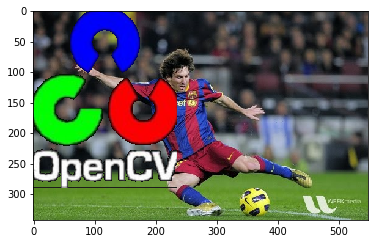

In [10]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
show_image(img1)

In [11]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()